# Objective : Movie Review Classification - NLP


# Exploratory Data Analysis (EDA) - Python

# Insights - Patterns

# Classification (Using the ML)

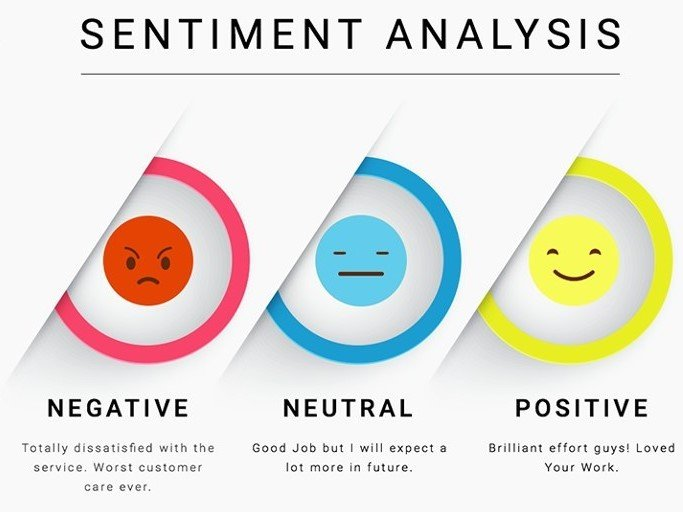


- In this Exercise, you are going to classify whether a given movie review is **positive or negative**.
- Are going to use Bag of words for pre-processing the text and apply different classification algorithms.
- Sklearn CountVectorizer has the inbuilt implementations for Bag of Words.

# 1. Load Python Modules

In [20]:
#Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.ensemble import RandomForestClassifier
from  sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB

from sklearn.pipeline import Pipeline

from sklearn.metrics import classification_report
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# 2. Read the Dataset from CSV file  - Using Pandas

### **About Data: IMDB Dataset**

Credits: https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews?resource=download


- This data consists of two columns.
        - review
        - sentiment
- Reviews are the statements given by users after watching the movie.
- sentiment feature tells whether the given review is positive or negative.

In [2]:
#1. read the data provided in the same directory with name 'movies_sentiment_data.csv' and store it in df variable
movies_df=pd.read_csv("IMDB Dataset.csv")

#2. print the shape of the data
print(movies_df.shape)

#3. print top 5 datapoints
print(movies_df.head(5))


(50000, 2)
                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


In [5]:
#creating a new column "Category" which represent 1 if the sentiment is positive or 0 if it is negative
movies_df["Category"]=movies_df["sentiment"].apply(lambda x: 1 if x=='positive' else 0)

In [6]:
#check the distribution of 'Category' and see whether the Target labels are balanced or not.

movies_df["Category"].value_counts()

Category
1    25000
0    25000
Name: count, dtype: int64

In [11]:
import re
import nltk
from nltk.stem import PorterStemmer
ps=PorterStemmer()
def process(text):
    text=text.strip()
    text=re.sub("<[^>]*>", " ",text)
    text=re.sub("[^a-zA-Z]"," ",text)
    text=text.lower()
    text=text.split()
    text = [ ps.stem(word) for word in text]
    return " ".join(text)
    

In [12]:
movies_df["processed_review"]=movies_df["review"].apply(process)

In [13]:
print(movies_df.head(5))

                                              review sentiment  Category  \
0  One of the other reviewers has mentioned that ...  positive         1   
1  A wonderful little production. <br /><br />The...  positive         1   
2  I thought this was a wonderful way to spend ti...  positive         1   
3  Basically there's a family where a little boy ...  negative         0   
4  Petter Mattei's "Love in the Time of Money" is...  positive         1   

                                    processed_review  
0  one of the other review ha mention that after ...  
1  a wonder littl product the film techniqu is ve...  
2  i thought thi wa a wonder way to spend time on...  
3  basic there s a famili where a littl boy jake ...  
4  petter mattei s love in the time of money is a...  


In [14]:
tfidf_vec=TfidfVectorizer()
X = tfidf_vec.fit_transform(movies_df['processed_review'])

In [15]:
X_train,X_test,y_train,y_test=train_test_split(X,movies_df["Category"],test_size=0.2)

In [16]:
def draw_heatmap(conf_matrix):
    sns.heatmap(conf_matrix, annot=True)
    plt.xlabel('Predicted Labels')
    plt.ylabel('Actual Labels')
    plt.title('Confusion Matrix')
    plt.show()

              precision    recall  f1-score   support

           0       0.89      0.84      0.86      5274
           1       0.83      0.88      0.85      4726

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000

[[4418  856]
 [ 561 4165]]


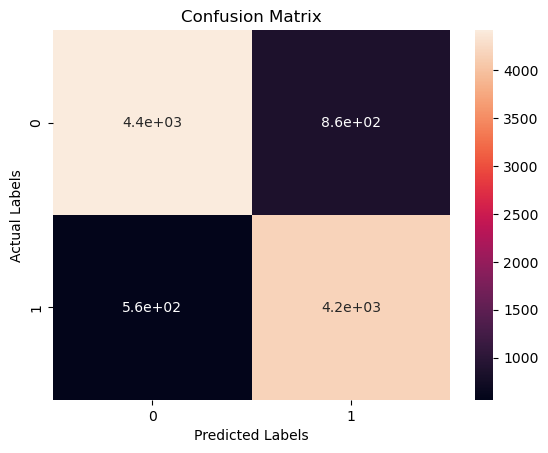

In [21]:
#1. create a pipeline object
mnb_clf = MultinomialNB()


#2. fit with X_train and y_train
mnb_clf.fit(X_train,y_train)

#3. get the predictions for X_test and store it in y_pred
y_pred=mnb_clf.predict(X_test)

#4. print the classfication report
print(classification_report(y_pred,y_test))

print(confusion_matrix(y_pred,y_test))
conf_matrix = confusion_matrix(y_pred,y_test)
draw_heatmap(conf_matrix)